In [1]:
import json
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/Users/karinabalagazova/Desktop/cvut/5.semestr/scientificProject/notebooks/..")
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
from functions.saving_data import get_empty_auc_dataset

In [2]:
# Load files with AUC scores
data_original = np.load('auc_results.npz', allow_pickle=True)
data_original = data_original['auc_data'].item()

data_expected = np.load('auc_results_expected.npz', allow_pickle=True)
data_expected = data_expected['auc_data'].item()

data_compensated = np.load('auc_results_compensated.npz', allow_pickle=True)
data_compensated = data_compensated['auc_data'].item()

In [16]:
# Get AUC scores of data with no class effect and strong IS effect
original = data_original[10]['IS_strong']['class_no']['auc']
expected = data_expected[10]['IS_strong']['class_no']['auc']
compensated = data_compensated[10]['IS_strong']['class_no']['auc']

Class effect: no. IS effect: 2 transcripts, effect = range(0.5, 1)


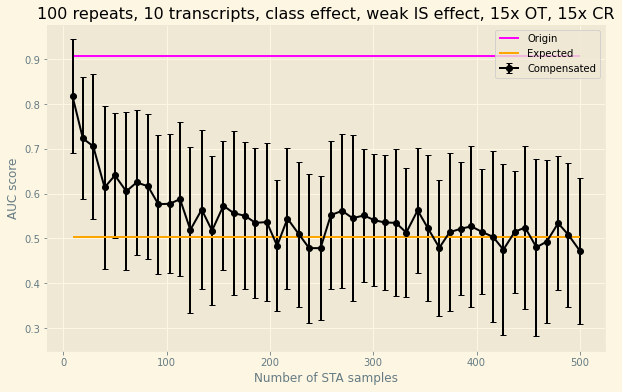

In [17]:
STA_range = data_original[10]['IS_strong']['class_no']['STA_range']
indexes = range(len(STA_range))
print(data_original[10]['IS_strong']['class_no']['description'])
plt.figure(figsize=(10,6))
plt.hlines(np.nanmean(original[indexes]), STA_range[0], STA_range[-1], colors=['magenta'], label='Origin')
plt.errorbar(STA_range, np.nanmean(compensated[indexes], axis=0), np.nanstd(compensated[indexes], axis=0), ecolor= 'black', fmt='-ok', capsize=3, label='Compensated')
plt.hlines(np.nanmean(expected[indexes]), STA_range[0], STA_range[-1], colors=['orange'], label='Expected') #orange

plt.legend()
plt.title('100 repeats, 10 transcripts, class effect, weak IS effect, 15x OT, 15x CR')
plt.xlabel('Number of STA samples')
plt.ylabel('AUC score')
plt.show()

In [3]:
# Load files with AUC scores
data_original = np.load('auc_results_origin5.npz', allow_pickle=True)
data_original = data_original['auc_data'].item()

data_expected = np.load('auc_results_expected5.npz', allow_pickle=True)
data_expected = data_expected['auc_data'].item()

data_compensated = np.load('auc_results_filtered5.npz', allow_pickle=True)
data_compensated = data_compensated['auc_data'].item()

In [17]:
t = 1000 # number of trascripts
n_IS = 5 # number of effected by IS transcripts
i = 0.9 # effect of IS
n_class = 10 # number of effected by class transcripts
c = 0.3 # effect of class (mean value)

# Get AUC scores of data with no class effect and strong IS effect
original = data_original[t][n_IS][i][n_class][c]['auc']
expected = data_expected[t][n_IS][i][n_class][c]['auc']
filtered = data_compensated[t][n_IS][i][n_class][c]['auc']

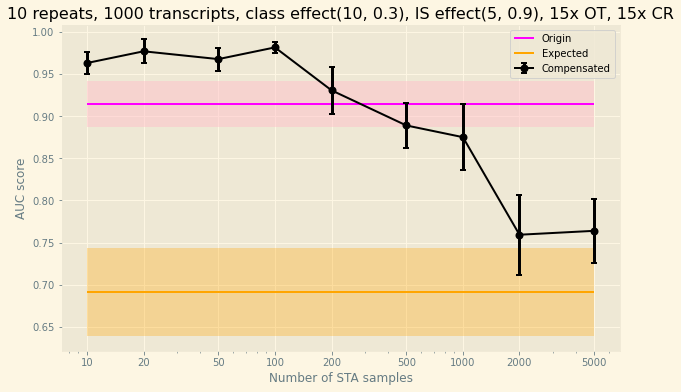

In [18]:
n_repeats = 10
STA_range = data_original[t][n_IS][i][n_class][c]['STA_range']
indexes = range(len(STA_range))
fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_xticks(STA_range)
ax.set_xticklabels(STA_range)

fig.set_size_inches(10, 6)

ax.hlines(np.nanmean(original[indexes]), STA_range[0],  STA_range[-1], colors=['magenta'], label='Origin')
ax.fill_between(STA_range, np.nanmean(original[indexes]) - np.nanstd(original[indexes])/np.sqrt(n_repeats), np.nanmean(original[indexes]) + np.nanstd(original[indexes])/np.sqrt(n_repeats),facecolor='pink', alpha= 0.5)

ax.errorbar(STA_range, np.nanmean(filtered[indexes], axis=0), np.nanstd(filtered[indexes], axis=0)/np.sqrt(n_repeats), ecolor= 'black', fmt='-ok', capsize=3, elinewidth=3, markeredgewidth=2, label='Compensated') #green

ax.hlines(np.nanmean(expected[indexes]),  STA_range[0],  STA_range[-1], colors=['orange'], label='Expected') #orange
ax.fill_between(STA_range, np.nanmean(expected[indexes]) - np.nanstd(expected[indexes])/np.sqrt(n_repeats), np.nanmean(expected[indexes]) + np.nanstd(expected[indexes])/np.sqrt(n_repeats),facecolor='orange', alpha= 0.3)

plt.legend()
plt.title("10 repeats, {t} transcripts, class effect({n_class}, {c}), IS effect({n_IS}, {i}), 15x OT, 15x CR".format(t=t, n_class=n_class, c=c, n_IS=n_IS, i=i))
plt.xlabel('Number of STA samples')
plt.ylabel('AUC score')

plt.savefig("26.05._NB_10x{t}_class_{n_class}_{c}_0.1_IS_{n_IS}_{i}.png".format(t=t, n_class=n_class, c=c, n_IS=n_IS, i=i))
plt.show()